# B2B SaaS Segmantation (Müşteri Segmentasyonu)

Bir B2B SaaS şirketi için müşteri segmentasyonu yapılmak isteniyor.  
mrr.csv dosyasında customerların USD biriminde ödedikleri aylık ücret yer almaktadır.

● Country_code: müşterinin ait olduğu ülke kodu,  
● Domain_code: müşteriyi tanımlayan unique id,  
● Actual: müşterinin ödediği aylık ücret (USD cinsinden).  


Müşterilerin ödedikleri ücret kendi local currencyleri ile olmaktadır ancak csv dosyasında usd cinsinden karşılıkları verilmiştir.  

Customerlar 3 segmente ayırılmak istenmektedir:  
* Enterprise,  
* Semi-Enterprise,  
* Longtail

● Bir B2B SaaS şirketi müşteri segmentasyonunu nasıl işlemler için kullanabilir?  
● Bu tür bir veri seti için nasıl bir istatistiksel model kullanılabilir? Bu modelin seçilme nedenleri nelerdir?  

# Business Understanding

Bir B2B SaaS şirketi müşterilerinin aylık ödeme ücretlerini kullanarak Kural Tabanlı (Rule Based) müşteri segmentasyonu oluşturmak istiyor.

#### 1. Buradan elde edilen segmentasyon sonuçları ile şunlar yapılabilir:  

* Pazarlama ve Satış Stratejileri: Her segment için özelleştirilmiş pazarlama kampanyaları ve satış stratejileri oluşturulabilir.
* Fiyatlandırma Stratejileri: Farklı segmentler için farklı fiyatlandırma stratejileri geliştirilebilir.
* Müşteri Memnuniyeti: Her segmentin ihtiyaçlarına göre müşteri memnuniyetini artıracak ve sadakati sağlayacak özel hizmetler sunulabilir.  
* Ürün Geliştirme: Segmentlere göre ürün geliştirme ve iyileştirme çalışmaları yapılabilir.

#### 2. Bu tür bir veri seti için nasıl bir istatistiksel model kullanılabilir? Bu modelin seçilme nedenleri nelerdir?  

Bu tür bir veri seti için  
* K-Means Clustering,
* Hierarchical Kümeleme,
* Classification gibi istatistiksel modeller kullanılabilir.    

#### 3: K-Means Clustering Modelini Seçme nedenleri:

* Veri setimizde belirli bir sınıflandırma etiketi bulunmamaktadır, müşterilerin ödeme bilgilerine dayanarak kendimiz bir segmentasyon oluşturmak istiyoruz.
* K-Means önceden belirlenmiş bir küme sayısı üzerinde çalıştığında daha iyi sonuçlar üretmektedir.  
* K-Means her noktayı küme merkezine olan mesafesine göre gruplar. Bizim veri setimiz (actual) için Eucliden Mesafesi genellikle daha iyi bir ayırım gerçekleştirir.


#### Ek olarak:

Kümeleme ve Sınıflandırma yöntemleri birlikte kullanılarak sonuçlar zenginleştirilebilir.   
Örneğin, öncelikle K-Means gibi bir kümeleme algoritması kullanarak veri setinde genel segmentleri belirleyebilir,  
ardından bu segmentlere dayalı olarak belirli niteliklere sahip müşterileri hedeflemek için sınıflandırma algoritmalarını kullanabiliriz.  
Bu şekilde, hem keşifsel hem de hedef odaklı bir analiz yapmış oluruz.    

Bu yöntem birçok gerçek dünya problemlerinde sıklıkla tercih edilmektedir.


## Data Understanding

In [871]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv("C:/Users/onurc/Desktop/New folder/mrr.csv", sep="\t")

df = data.copy()

df.head()

,country_code,domain_code,actual
0,PL,0018d00000WDHbdAAH,6695.000000
1,HK,0018d00000K0aQyAAJ,6690.000000
2,BR,0018d00000K0V2EAAV,6675.199492
3,KR,0018d00000K0WOhAAN,6617.572069
4,BR,0018d00000K0TnJAAV,6598.242637


In [872]:
df.info()

# Veri seti 3 kolon ve 875 satırdan oluşmaktadır.
# Null değer yoktur.
# Değişkenler object ve float tipindedir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  875 non-null    object 
 1   domain_code   875 non-null    object 
 2   actual        875 non-null    float64
dtypes: float64(1), object(2)
memory usage: 20.6+ KB


In [873]:
# Veri setindeki unique değerlerin incelenmesi

df.nunique()

# Veri Tekilleştirme gerekmemektedir. 

country_code     23
domain_code     875
actual          843
dtype: int64

In [874]:
# Merkezi Eğilim Ölçüleri (Measures of Central Tendency)

df.describe().T

# Standart Sapmamız yüksek, verinin dağılımı geniştir. Aykırı Değer (Outlier) olabilir
# Ortalama > Medyan olduğundan dolayı dağılım grafiğinin hafif sağa çarpık olduğunu söyleyebiliriz. (positively skewed)
# Min ve Max değerler arasındaki fark oldukça yüksektir. Veri çok geniş bir aralığa yayılmıştır. 

,count,mean,std,min,25%,50%,75%,max
actual,875.0,2744.600966,1834.929189,0.529164,1222.484783,2410.199501,4060.554492,6695.0


<Axes: xlabel='actual'>

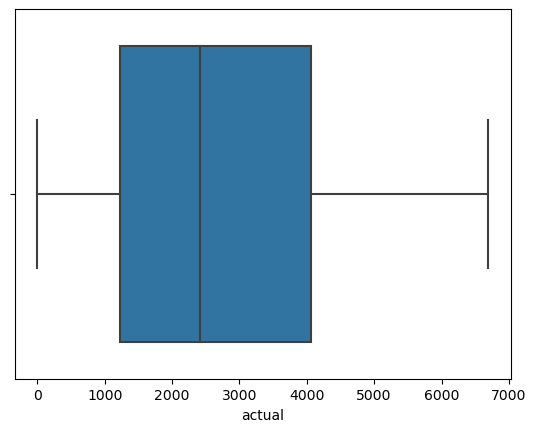

In [875]:
sns.boxplot(x = df["actual"], data= df)

# Medyan çizgisi hafif sol tarafta yer alıyor (Sağa çarpık bir veri seti) Ayrıca üst whisker da daha uzun  
# Veri seti Q3üzerinde yoğunlaşıyor, büyük değerler bu kısımda bulunmaktadır.
# Yine de aykırı değer olmaması, verinin normal dağıldığı anlamına gelmiyor 

<Axes: xlabel='actual', ylabel='country_code'>

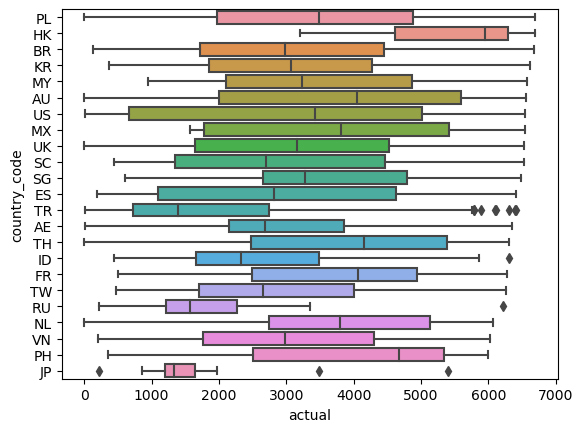

In [876]:
# Çaprazlama yaparak tekrar incelemede bulunursak

sns.boxplot(x = df["actual"],y = df["country_code"])


# TR, ID, RU, JP gibi bazı ülkelerde uç değerler gözlemlenmektedir.
# Bu uç değerler, veri setinde dikkate alınması gereken olağan dışı değerler olduğunu gösterebilir.

In [877]:
# IQR Yöntemi ile Aykırı Değerler

Q1 = df["actual"].quantile(0.25)
Q3 = df["actual"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı Değerler
# filtered_df = df[ (df["actual"] < lower_bound) | (df["actual"] > upper_bound) ]    

# Aykırı Olmayan Değerler
filtered_df = df[( df['actual'] >= lower_bound) & (df['actual'] <= upper_bound) ] 

filtered_df.head()


,country_code,domain_code,actual
0,PL,0018d00000WDHbdAAH,6695.000000
1,HK,0018d00000K0aQyAAJ,6690.000000
2,BR,0018d00000K0V2EAAV,6675.199492
3,KR,0018d00000K0WOhAAN,6617.572069
4,BR,0018d00000K0TnJAAV,6598.242637


<Axes: xlabel='actual', ylabel='country_code'>

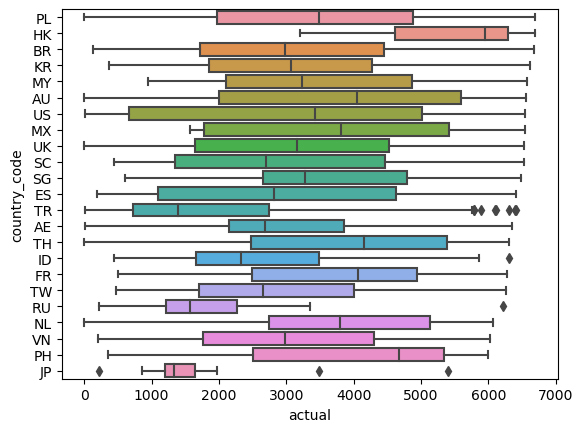

In [878]:
# IQR'dan sonra grafik ile tekrar incelediğimizde bir değişiklik olmadığını görebiliriz.

sns.boxplot(x = "actual", y = "country_code", data=filtered_df)

In [879]:
# Tekilleştirme işlemlerinin kontrolü (Unique)

df["domain_code"].nunique()
df["domain_code"].value_counts()

0018d00000WDHbdAAH    1
0018d00000K0X9bAAF    1
001Pz0000083CEaIAM    1
0018d00000K0YB7AAN    1
0018d00000K0XsSAAV    1
                     ..
0018d00000ewNVOAA2    1
0018d00000K0c9sAAB    1
0018d00000RlWeIAAV    1
0018d00000K0bEjAAJ    1
0018d00000K0UoZAAV    1
Name: domain_code, Length: 875, dtype: int64

In [880]:
# Hangi ülkeden kaç adet satış gerçekleştirilmiştir?

df["country_code"].nunique()
df["country_code"].value_counts()

# TR 318 müşteri sayısıyla oldukça yoğun bir kitleye sahiptir.
# BR ise ikinci sırada ve 74 müşteri sayısına sahiptir.
# MX, HK ve PH ise en düşük müşteri sayısına sahip son 3 ülke olarak dikkat çekmektedir.


TR    318
BR     74
TW     57
AE     54
ID     45
VN     38
AU     30
PL     29
UK     25
NL     22
ES     20
US     20
FR     19
SG     18
KR     18
TH     15
SC     14
MY     14
JP     14
RU     12
MX      9
HK      7
PH      3
Name: country_code, dtype: int64

In [881]:
# Potansiyel Hedef Tespiti
# Ülkelere göre satışlardan toplam kazanç nedir?

total_actual = df.groupby("country_code").agg({"actual": "sum"}).sort_values(by="actual", ascending=False)

total_actual['actual'] = total_actual['actual'].apply(lambda x: '{:,.2f}'.format(x))

total_actual

# Müşteri sayılarına paralel olarak kazançlarda yaklaşık olarak aynı sırada görünmektedir.
# Anomali bulunmamaktadır.

,actual
country_code,
TR,"609,354.22"
BR,"240,304.77"
TW,"174,968.07"
AE,"168,793.86"
ID,"121,348.34"
VN,"115,446.85"
AU,"113,723.46"
PL,"101,233.16"
UK,"81,141.38"


In [882]:
# Ülkelere göre kazançların ortalaması ne kadar? 

mean_actual = df.groupby(["country_code"]).agg({"actual" : "mean"}).sort_values(by="actual", ascending=False)

mean_actual["actual"] = mean_actual["actual"].apply(lambda x: '{:,.2f}'.format(x))

mean_actual

# Toplam Satışlar ve Ortalama Kazançlar göz önünde bulundurulduğunda 
# HK, MX, AU ülkeleri toplam satışta çok düşük olmalarına rağmen kazançların ortalamasında ilk sıralarda yer almaktadır.
# Bu durumda, bahsedilen ülkeler az sayıda yüksek kazançlı ürün satmış olabilirler.

,actual
country_code,
HK,"5,376.29"
MX,"3,812.93"
AU,"3,790.78"
TH,"3,771.44"
FR,"3,738.49"
PH,"3,674.00"
NL,"3,672.50"
MY,"3,603.46"
SG,"3,524.01"


In [883]:
# Ülkelere göre toplam satış sayısı, toplam kazanç ve ortalama kazancı birlikte değerlendirmek

country_result = df.groupby('country_code').agg(
    total_sales_count=('actual', 'size'),  # Satış sayısı
    total_sales_value=('actual', 'sum'),   # Toplam kazanç
    avg_sales_value=('actual', 'mean')     # Ortalama kazanç
).sort_values(by='avg_sales_value', ascending=False)


country_result['total_sales_value'] = country_result['total_sales_value'].apply(lambda x: '{:,.2f}'.format(x))
country_result['avg_sales_value'] = country_result['avg_sales_value'].apply(lambda x: '{:,.2f}'.format(x))

country_result


,total_sales_count,total_sales_value,avg_sales_value
country_code,,,
HK,7,"37,634.00","5,376.29"
MX,9,"34,316.37","3,812.93"
AU,30,"113,723.46","3,790.78"
TH,15,"56,571.59","3,771.44"
FR,19,"71,031.29","3,738.49"
PH,3,"11,022.00","3,674.00"
NL,22,"80,795.08","3,672.50"
MY,14,"50,448.40","3,603.46"
SG,18,"63,432.14","3,524.01"


In [884]:
# Ülke ve Müşterilerle birlikte Actual değerinin incelenmesi 

country_domain_cross = df.groupby(["country_code", "domain_code"]).agg({"actual" : "mean"}).reset_index().sort_values(by = "actual", ascending=False)
country_domain_cross.head()

,country_code,domain_code,actual
352,PL,0018d00000WDHbdAAH,6695.000000
201,HK,0018d00000K0aQyAAJ,6690.000000
88,BR,0018d00000K0V2EAAV,6675.199492
264,KR,0018d00000K0WOhAAN,6617.572069
85,BR,0018d00000K0TnJAAV,6598.242637


<Axes: xlabel='actual', ylabel='country_code'>

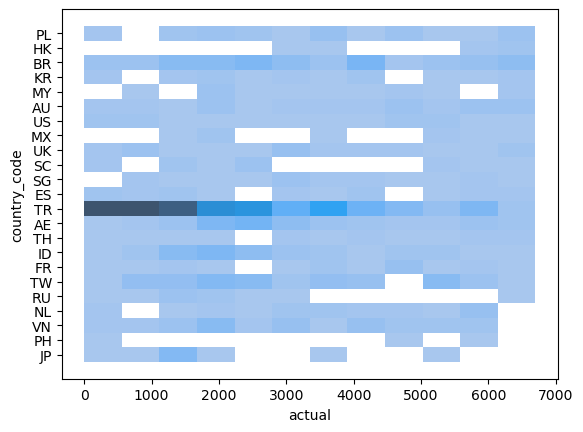

In [885]:
sns.histplot(x="actual", y="country_code", data=df)

c:\Users\onurc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


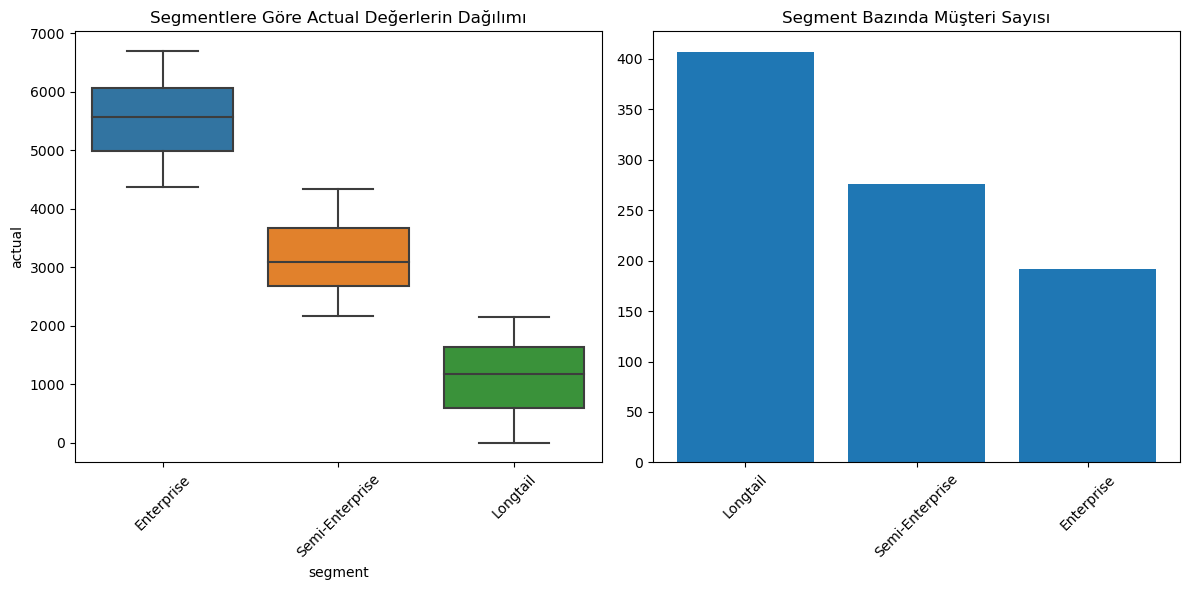


Segment Özeti:
           segment  Mean Actual  Median Actual  Customer Count  \
0       Enterprise      5541.52        5573.82             192   
1         Longtail      1132.04        1172.57             407   
2  Semi-Enterprise      3176.86        3082.12             276   

   Unique Country Count  
0                    23  
1                    22  
2                    22  


In [887]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Veriyi hazırlama
X = df[['actual']]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means modelini oluşturma ve eğitim
kmeans = KMeans(n_clusters=3, random_state=42)
df['segment'] = kmeans.fit_predict(X_scaled)

# Segmentlerin ortalamalarını bulma
segment_means = df.groupby('segment')['actual'].mean().sort_values(ascending=False)

# Segment isimlendirme - en yüksek ortalamaya sahip segment Enterprise olmalı
segment_labels = {
    segment_means.index[0]: 'Enterprise',
    segment_means.index[1]: 'Semi-Enterprise',
    segment_means.index[2]: 'Longtail'
}
df['segment'] = df['segment'].map(segment_labels)

# Segmentlerin özetlenmesi
segment_summary = df.groupby('segment').agg({
    'actual': ['mean', 'median', 'count'],
    'country_code': 'nunique'
}).round(2)

# Sütun isimlerini düzenleme
segment_summary.columns = ['Mean Actual', 'Median Actual', 'Customer Count', 'Unique Country Count']
segment_summary = segment_summary.reset_index()

# Görselleştirme
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='segment', y='actual', data=df)
plt.title('Segmentlere Göre Actual Değerlerin Dağılımı')
plt.xticks(rotation=45)

# Müşteri sayısı dağılımı
plt.subplot(1, 2, 2)
customer_counts = df['segment'].value_counts()
plt.bar(customer_counts.index, customer_counts.values)
plt.title('Segment Bazında Müşteri Sayısı')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Sonuçları kaydetme
df.to_csv('mrr_segmentation.csv', index=False)

# Özet tabloyu gösterme
print("\nSegment Özeti:")
print(segment_summary)

c:\Users\onurc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\onurc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\onurc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\onurc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

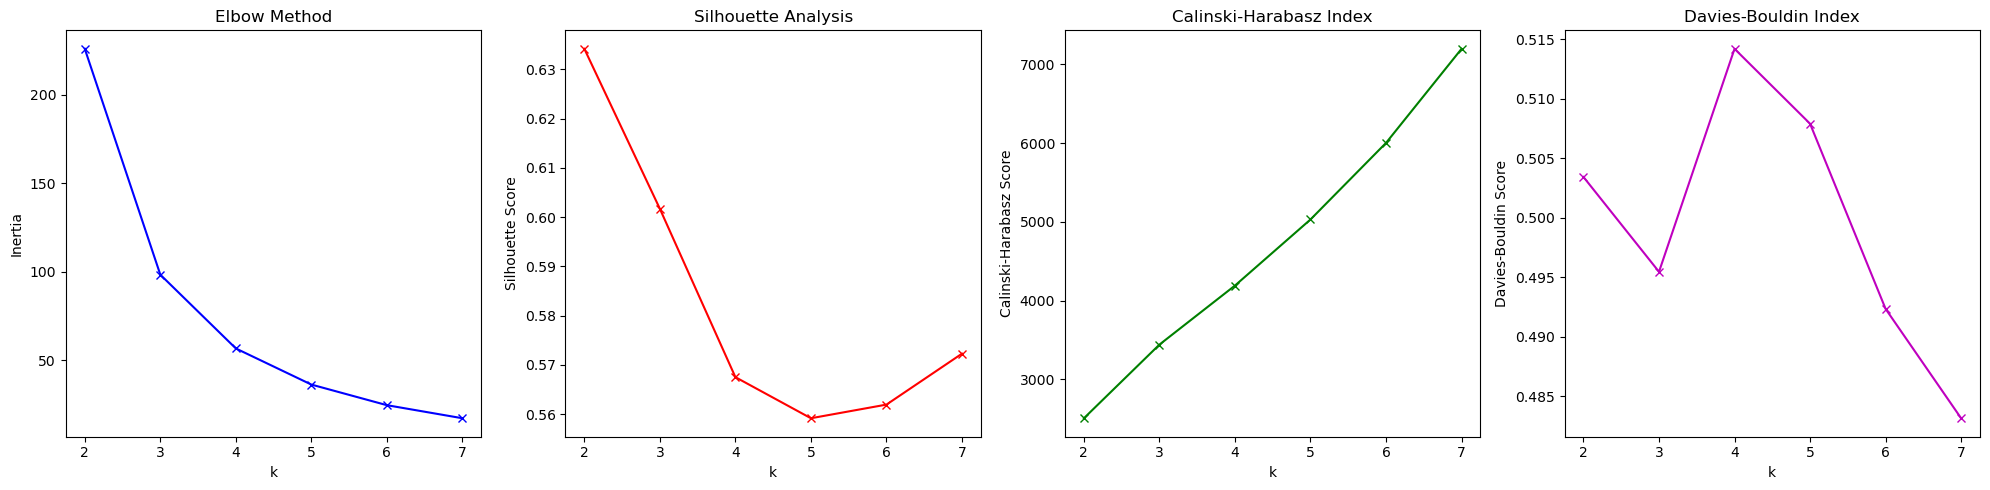


Hiperparametre Test Sonuçları:
        init  n_init    inertia  silhouette  iterations
0  k-means++      10  98.372694    0.601685           9
1  k-means++      20  98.372694    0.601685           9
2  k-means++      30  98.372694    0.601685           9
3     random      10  98.372694    0.601685          10
4     random      20  98.372694    0.601685          10
5     random      30  98.372694    0.601685          10

En İyi Parametreler:
init          k-means++
n_init               10
inertia       98.372694
silhouette     0.601685
iterations            9
Name: 0, dtype: object

Optimize Edilmiş Model Segment Özeti:
                    actual                        country_code
                      mean   median count     std      nunique
optimized_segment                                             
Enterprise         5541.52  5573.82   192  648.36           23
Longtail           1132.04  1172.57   407  604.06           22
Semi-Enterprise    3176.86  3082.12   276  610.23        

In [888]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi hazırlama
X = df[['actual']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Optimal Küme Sayısının Belirlenmesi (Elbow Method)
inertias = []
silhouette_scores = []
ch_scores = []
db_scores = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))

# Metrikleri görselleştirme
plt.figure(figsize=(20, 5))

# Elbow Method
plt.subplot(1, 4, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Silhouette Score
plt.subplot(1, 4, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

# Calinski-Harabasz Score
plt.subplot(1, 4, 3)
plt.plot(K, ch_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Index')

# Davies-Bouldin Score
plt.subplot(1, 4, 4)
plt.plot(K, db_scores, 'mx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

# 2. Farklı initialization methods ve n_init değerlerinin test edilmesi
init_methods = ['k-means++', 'random']
n_inits = [10, 20, 30]

results = []
for init in init_methods:
    for n_init in n_inits:
        kmeans = KMeans(n_clusters=3, init=init, n_init=n_init, random_state=42)
        kmeans.fit(X_scaled)
        
        results.append({
            'init': init,
            'n_init': n_init,
            'inertia': kmeans.inertia_,
            'silhouette': silhouette_score(X_scaled, kmeans.labels_),
            'iterations': kmeans.n_iter_
        })

results_df = pd.DataFrame(results)
print("\nHiperparametre Test Sonuçları:")
print(results_df)

# 3. En iyi parametrelerle final model
best_params = results_df.loc[results_df['silhouette'].idxmax()]
print("\nEn İyi Parametreler:")
print(best_params)

final_kmeans = KMeans(
    n_clusters=3,
    init=best_params['init'],
    n_init=int(best_params['n_init']),
    random_state=42
)

df['optimized_segment'] = final_kmeans.fit_predict(X_scaled)

# Segment ortalamalarını bulma ve isimlendirme
segment_means = df.groupby('optimized_segment')['actual'].mean().sort_values(ascending=False)
segment_labels = {
    segment_means.index[0]: 'Enterprise',
    segment_means.index[1]: 'Semi-Enterprise',
    segment_means.index[2]: 'Longtail'
}
df['optimized_segment'] = df['optimized_segment'].map(segment_labels)

# 4. Final model değerlendirmesi
final_summary = df.groupby('optimized_segment').agg({
    'actual': ['mean', 'median', 'count', 'std'],
    'country_code': 'nunique'
}).round(2)

print("\nOptimize Edilmiş Model Segment Özeti:")
print(final_summary)

# Segment karşılaştırması
comparison = pd.crosstab(df['segment'], df['optimized_segment'])
print("\nOrijinal vs Optimize Edilmiş Segment Karşılaştırması:")
print(comparison)